# Yelp Review Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read toronto restaurant review data
# Read data from gcp
# df = pd.read_csv('gs://yelp_review_toronto_restaurant/toronto_restaurant_review.csv', index_col=0)
# Read data from local file
df = pd.read_csv('toronto_restaurant_review.csv')
toronto_restaurant_review = df.text

In [3]:
df.head()

,Unnamed: 0,business_id,cool,date,funny,review_id,stars_x,text,useful,user_id,...,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars_y,state
0,0,AakkkTuGZA2KBodKi2_u8A,0,2012-07-16 00:37:14,1,JVcjMhlavKKn3UIt9p9OXA,1,I cannot believe how things have changed in 3 ...,1,TpyOT5E16YASd7EWjLQlrw,...,Toronto,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,43.649674,-79.435116,Pho Phuong,M6K 1T9,55,3.5,ON
1,1,AakkkTuGZA2KBodKi2_u8A,0,2014-02-24 01:45:02,0,vKhtzhPUz9RJbllyvHm3qA,3,"Pretty good, food,, about the same as other vi...",0,G-9ujgKmc1J2k7HSqXszsw,...,Toronto,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,43.649674,-79.435116,Pho Phuong,M6K 1T9,55,3.5,ON
2,2,AakkkTuGZA2KBodKi2_u8A,0,2016-02-12 00:25:23,0,Je6AF9sTKwXwOVw2YHR1dg,5,I've been going to this place since it opened ...,0,NA4sslQXta6U263fqzwKiw,...,Toronto,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,43.649674,-79.435116,Pho Phuong,M6K 1T9,55,3.5,ON
3,3,AakkkTuGZA2KBodKi2_u8A,0,2013-05-07 06:03:17,0,b_xVF8U5Vqljz58OUEjqgA,4,One of the best Vietnamese places I`ve tried i...,1,1fNQRju9gmoCEvbPQBSo7w,...,Toronto,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,43.649674,-79.435116,Pho Phuong,M6K 1T9,55,3.5,ON
4,4,AakkkTuGZA2KBodKi2_u8A,0,2011-11-30 16:46:24,0,vFPpG1xDBSWcvy_165fxKg,3,"This place is just ok. Nice atmosphere, big op...",0,fYJGKhZK2FZckYWDMdCooA,...,Toronto,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,43.649674,-79.435116,Pho Phuong,M6K 1T9,55,3.5,ON


## 1. What is the average length of the review?

### Distribution of Character & Word Counts in Reviews

In [15]:
review_lens = [len(review) for review in df.text]
review_word_lens = [len(review.split()) for review in df.text]

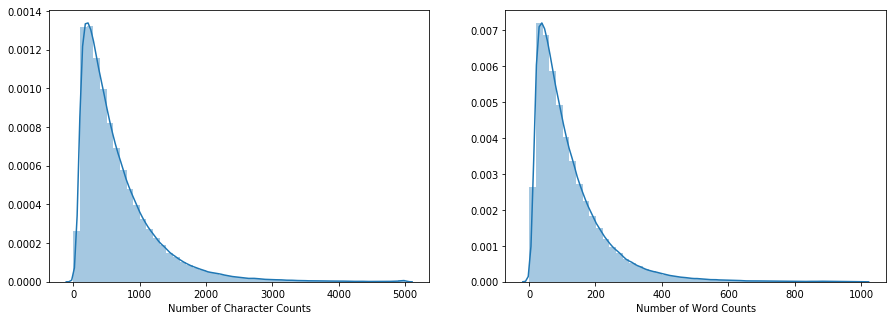

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(review_lens, ax=axs[0])
axs[0].set_xlabel('Number of Character Counts')
sns.distplot(review_word_lens, ax=axs[1])
axs[1].set_xlabel('Number of Word Counts')
plt.show()

### Boxplot of Word Counts in Reviews

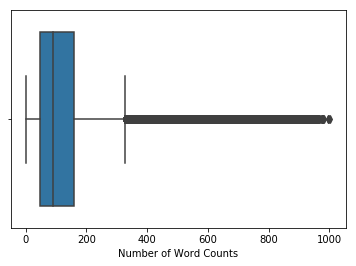

In [17]:
sns.boxplot(x=review_word_lens)
plt.xlabel('Number of Word Counts')
plt.show()

### Statistics of Word Counts in Reviews

In [14]:
print(f'Mean of Word Counts: {np.mean(review_word_lens, dtype=int)}')
print(f'Median of Word Counts: {np.median(review_word_lens)}')
print(f'STD of Word Counts: {np.std(review_word_lens, dtype=int)}')

Mean of Word Counts: 122
Median of Word Counts: 91.0
STD of Word Counts: 108


### Conclusion
As there are some really long reviews, median is used for average.

The average length of reivews are 91 words with std 108 words.

## 2. There are three labels for reviews (useful, funny, cool), which one do people use more frequently?

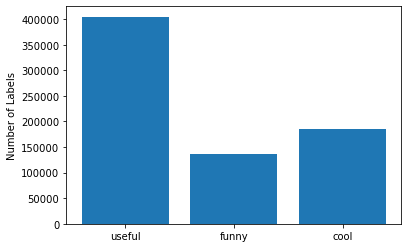

In [6]:
review_labels = ['useful', 'funny', 'cool']
sums = df[review_labels].sum()
index = np.arange(len(sums))

plt.bar(index, sums)
plt.xticks(index, review_labels)
plt.ylabel('Number of Labels')
plt.show()

### Conclusion
People use useful label more often than the other two.

## 3. What is the distribution of the star given by customers?

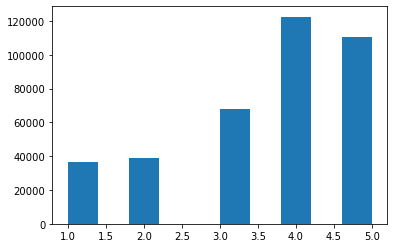

In [5]:
plt.hist(df.stars_x)
plt.show()

### Conclusion
From the plot, customers give more good stars (stars higher than 3).

## Is there any relationship between the length of review and the labels?

## Is there any relationship between the stars of the review and the labels?

### Is there any relationship between the stars of the restaurant and the number of reviews of that restaurant?